In [ ]:
# Economic Indicators & Inflation Analysis (2010–2025)

In [ ]:
## 1. Data Source
Dataset: Economic Indicators & Inflation (Kaggle)

In [ ]:
## 2. Data Loading

In [3]:

import pandas as pd

DATA_PATH = "../data/Economic_Indicators_Inflation.csv"
df = pd.read_csv(DATA_PATH)

df.head()

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


Countries:
'USA' 'China' 'Japan' 'Germany' 'India' 'UK' 'Canada' 'Russia'
 'Australia' 'France' 'South Korea' 'Saudi Arabia' 'Brazil' 'Italy'
 'Bangladesh' 'Indonesia' 'Turkey' 'Malaysia' 'Pakistan'

In [4]:
print("Shape:", df.shape)
print("\nColumns:\n", list(df.columns))

print("\nData types:\n")
print(df.dtypes)

print("\nMissing values (top 10):\n")
print(df.isna().sum().sort_values(ascending=False).head(10))

Shape: (304, 6)

Columns:
 ['Country', ' Year', ' GDP (in billion USD)', ' Inflation Rate (%)', ' Unemployment Rate (%)', ' Economic Growth (%)']

Data types:

Country                    object
 Year                       int64
 GDP (in billion USD)     float64
 Inflation Rate (%)       float64
 Unemployment Rate (%)    float64
 Economic Growth (%)      float64
dtype: object

Missing values (top 10):

Country                   0
 Year                     0
 GDP (in billion USD)     0
 Inflation Rate (%)       0
 Unemployment Rate (%)    0
 Economic Growth (%)      0
dtype: int64


In [5]:
df.describe(include="all")

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
count,304,304.000000,304.000000,304.000000,304.000000,304.000000
unique,19,NaN,NaN,NaN,NaN,NaN
top,USA,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN
mean,NaN,2017.500000,3173.934211,35.531776,6.805493,3.391349
std,NaN,4.617373,4365.913537,131.757515,6.687968,3.626414
min,NaN,2010.000000,1.000000,-1.200000,1.600000,-14.000000
25%,NaN,2013.750000,475.000000,1.635000,4.275000,1.700000
50%,NaN,2017.500000,1900.000000,3.300000,5.400000,2.900000
75%,NaN,2021.250000,3425.000000,5.857500,7.800000,5.905000


In [ ]:
## 3. Data Cleaning & Standardization

In [6]:

# 1. Clean column names (GitHub-friendly)
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
)

# 2. Rename columns for clarity
df = df.rename(columns={
    "gdp_in_billion_usd": "gdp_billion_usd",
    "inflation_rate_%": "inflation_rate",
    "unemployment_rate_%": "unemployment_rate",
    "economic_growth_%": "economic_growth"
})

# 3. Ensure correct data types
df["year"] = df["year"].astype(int)

numeric_cols = [
    "gdp_billion_usd",
    "inflation_rate",
    "unemployment_rate",
    "economic_growth"
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# 4. Final validation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            304 non-null    object 
 1   year               304 non-null    int64  
 2   gdp_billion_usd    304 non-null    float64
 3   inflation_rate     304 non-null    float64
 4   unemployment_rate  304 non-null    float64
 5   economic_growth    304 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 14.4+ KB


In [ ]:
## 4. Exploratory Data Analysis (EDA)

In [ ]:
### Average GDP by Country (2010–2025)

This chart compares average GDP levels across countries over the 2010–2025
period, highlighting differences in economic size and global influence.

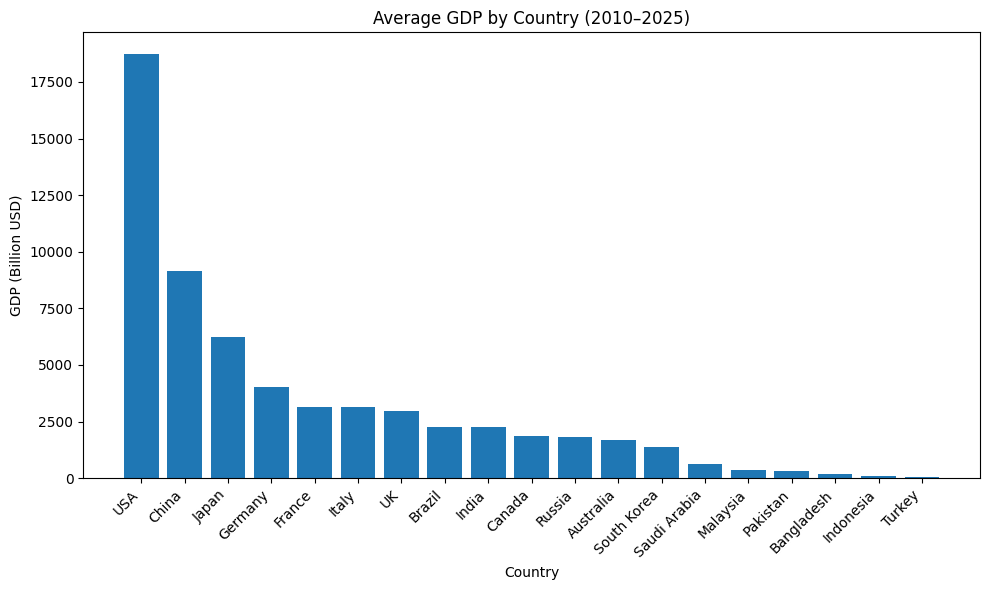

In [7]:

import matplotlib.pyplot as plt

# Calculate average GDP by country
avg_gdp = (
    df.groupby("country", as_index=False)["gdp_billion_usd"]
      .mean()
      .sort_values("gdp_billion_usd", ascending=False)
)

plt.figure(figsize=(10, 6))
plt.bar(avg_gdp["country"], avg_gdp["gdp_billion_usd"])
plt.xticks(rotation=45, ha="right")
plt.title("Average GDP by Country (2010–2025)")
plt.ylabel("GDP (Billion USD)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

In [ ]:
## 5. Visual Analysis

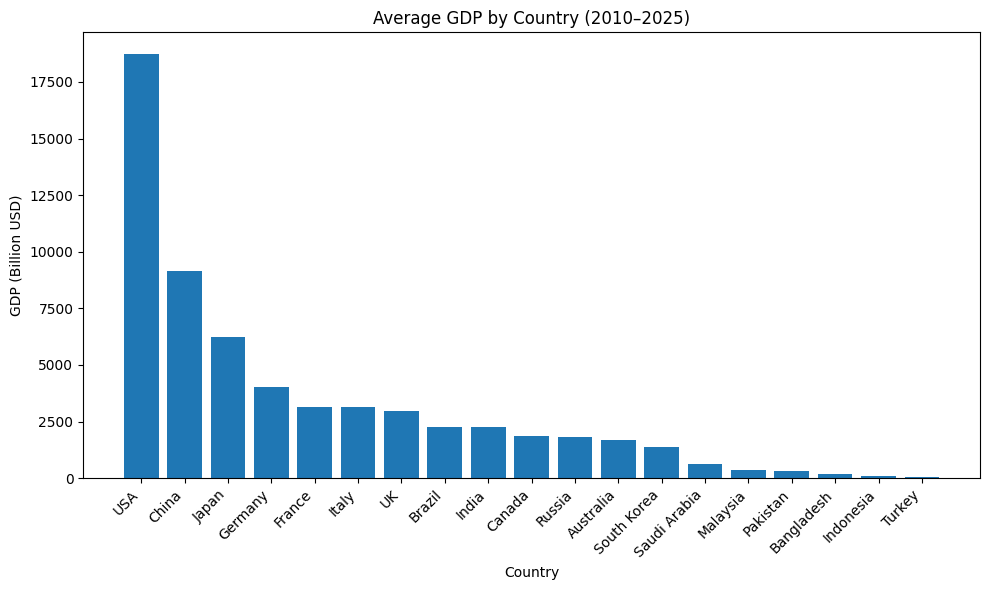

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(avg_gdp["country"], avg_gdp["gdp_billion_usd"])
plt.xticks(rotation=45, ha="right")
plt.title("Average GDP by Country (2010–2025)")
plt.ylabel("GDP (Billion USD)")
plt.xlabel("Country")
plt.tight_layout()
plt.savefig("../outputs/figures/avg_gdp_by_country.png", dpi=200)
plt.show()

In [ ]:
### Average Economic Growth by Country (2010–2025)

This visualization highlights differences in long-term economic growth,
showing faster growth in emerging economies compared to developed nations.

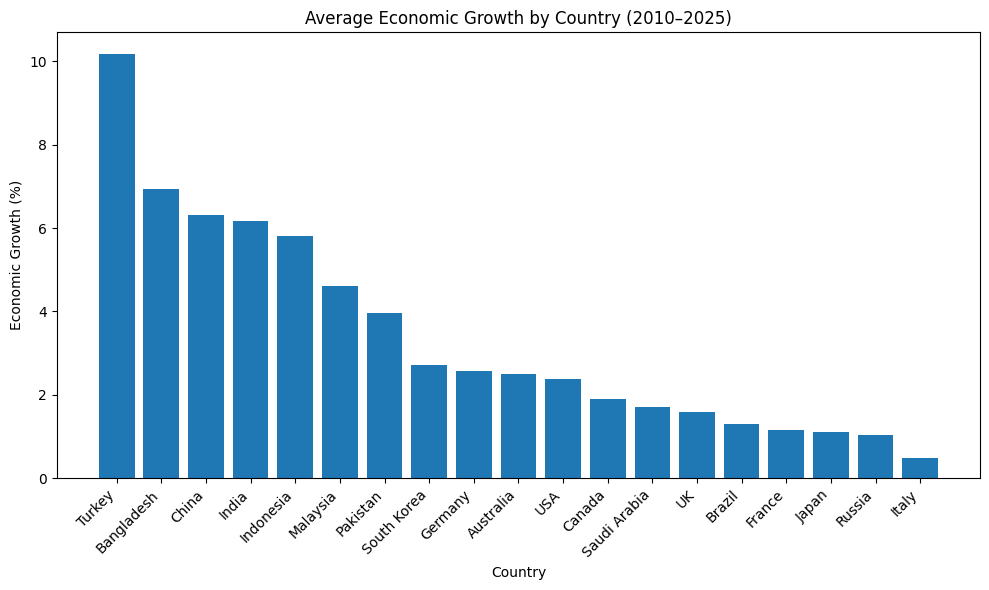

In [10]:
import matplotlib.pyplot as plt

avg_growth = (
    df.groupby("country", as_index=False)["economic_growth"]
      .mean()
      .sort_values("economic_growth", ascending=False)
)

plt.figure(figsize=(10, 6))
plt.bar(avg_growth["country"], avg_growth["economic_growth"])
plt.xticks(rotation=45, ha="right")
plt.title("Average Economic Growth by Country (2010–2025)")
plt.ylabel("Economic Growth (%)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

In [ ]:
### Inflation Rate by Country (2024)

This chart shows inflation rates across countries in 2024, illustrating
price stability differences between developed and emerging economies.

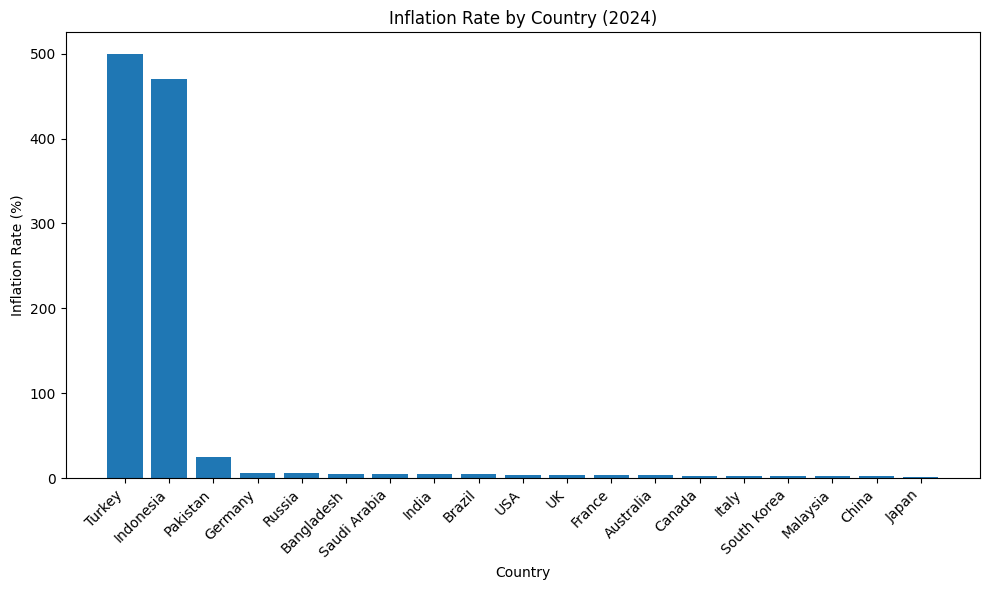

In [12]:
import matplotlib.pyplot as plt

df_2024 = df[df["year"] == 2024].copy()

infl_2024 = (
    df_2024.groupby("country", as_index=False)["inflation_rate"]
      .mean()
      .sort_values("inflation_rate", ascending=False)
)

plt.figure(figsize=(10, 6))
plt.bar(infl_2024["country"], infl_2024["inflation_rate"])
plt.xticks(rotation=45, ha="right")
plt.title("Inflation Rate by Country (2024)")
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

In [ ]:
### Global Inflation vs Economic Growth (2010–2025)

This line chart examines the relationship between inflation and economic
growth over time, highlighting periods where high inflation coincides
with slower growth.

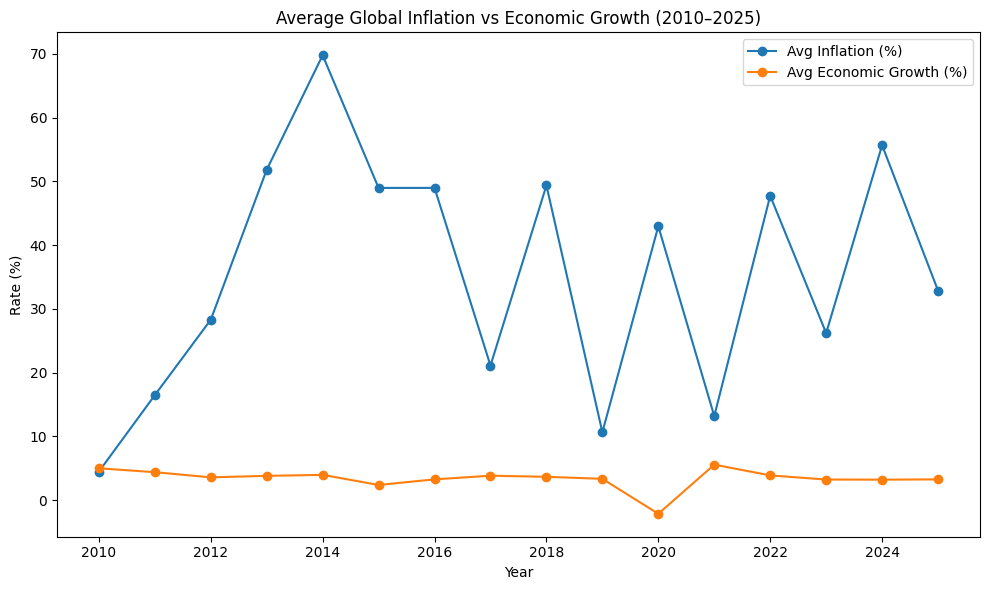

In [14]:
import matplotlib.pyplot as plt

yearly = (
    df.groupby("year", as_index=False)
      .agg(avg_inflation=("inflation_rate", "mean"),
           avg_growth=("economic_growth", "mean"))
      .sort_values("year")
)

plt.figure(figsize=(10, 6))
plt.plot(yearly["year"], yearly["avg_inflation"], marker="o", label="Avg Inflation (%)")
plt.plot(yearly["year"], yearly["avg_growth"], marker="o", label="Avg Economic Growth (%)")

plt.title("Average Global Inflation vs Economic Growth (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### Canada: Inflation, Unemployment & Economic Growth (2020–2025)

This chart explores post-pandemic economic dynamics in Canada, showing
inflation spikes, unemployment recovery, and stabilization of growth.

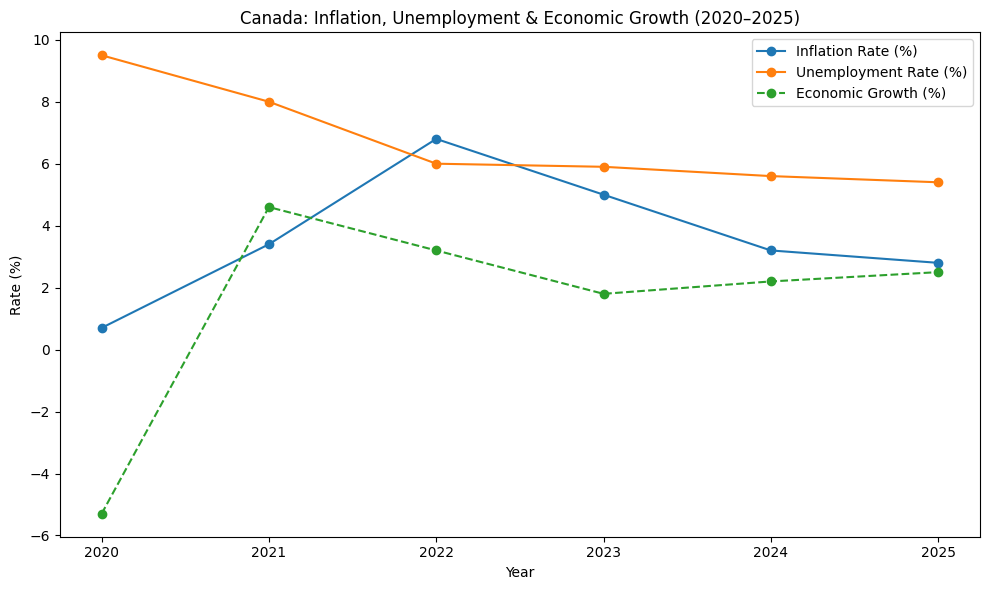

In [16]:
import matplotlib.pyplot as plt

canada = df[
    (df["country"] == "Canada") &
    (df["year"].between(2020, 2025))
].sort_values("year")

plt.figure(figsize=(10, 6))

plt.plot(canada["year"], canada["inflation_rate"],
         marker="o", label="Inflation Rate (%)")

plt.plot(canada["year"], canada["unemployment_rate"],
         marker="o", label="Unemployment Rate (%)")

plt.plot(canada["year"], canada["economic_growth"],
         marker="o", linestyle="--", label="Economic Growth (%)")

plt.title("Canada: Inflation, Unemployment & Economic Growth (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
## 6. Key Insights
- High inflation correlates with slower economic growth.
- Emerging economies show higher growth with higher volatility.
- Canada shows post-2020 recovery with declining unemployment.

In [ ]:
## 7. Conclusion
This project demonstrates how macroeconomic indicators interact across
countries and over time, highlighting the importance of stable inflation
for sustainable growth.